# Исследование интернет-магазина "Стримчик"

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель исследования:

+ Проанализировать и визуализировать общую информацию;

+ Отработать принцип работы с данными;

+ Сделать ставку на потенциально популярный продукт и спланировать рекламные кампании;

+ Проверить гипотезы.

### Ход исследования

* Изучим общую информацию;
* Приведём столбцы к нижнему регистру; 
* Преобразуем данные в нужные типы, обработаем пропуски;
* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец;
* Посмотрим, сколько игр выпускалось в разные годы;
* Посмотрим, как менялись продажи по платформам;
* Используем пайплайн ;
* Определим для пользователя каждого региона самые популярные платформы,жанры и влияет ли рейтинг ESRB на продажи;
* Проверим гипотезы.

## Изучение общей информации

***Импортируем нужные библиотеки***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

***Откроем файл с данными и изучим общую информацию***

In [2]:
data_games = pd.read_csv('/datasets/games.csv')

In [3]:
pd.set_option('display.max_rows', None)#параметр для выводы всего датафрейма
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data_games.isna().sum() # посмотрим количество пропущенных значений в каждом столбце

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
data_games[data_games['Name'].isna()] #количество пропущенных значений в столбце "Name"

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
data_games[data_games['Year_of_Release'].isna()].head() #количество пропущенных значений в столбце "Year_of_Release"

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [8]:
data_games[data_games['Genre'].isna()] #количество пропущенных значений в столбце "Genre"

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data_games[data_games['Critic_Score'].isna()].head() #количество пропущенных значений в столбце "Critic_Score"

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [10]:
data_games[data_games['User_Score'].isna()].head() #количество пропущенных значений в столбце "User_Score"

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [11]:
data_games[data_games['Rating'].isna()].head() #количество пропущенных значений в столбце "Rating"

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


***Вывод по первому шагу:***

*Используются 3 категориальных типа переменных(Name, Platform, Genre, Rating) и 7 количественных(Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score);*

*Не во всех столбцах корректные типы данных, есть пропуски.*

## Подготовка данных

***Заменим названия столбцов,приведя их к нижнему регистру***

In [12]:
data_games.columns = data_games.columns.str.lower()
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [13]:
data_games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


***Преобразуем данные в нужные типы***

***Преобразуем 'year_of_release' в тип int, так как год - это целое число***

In [14]:
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64')

***Значение tbd(To Be Determined - "Будет определено") означает, что оценки нет, поэтому заменим на NaN***

In [15]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan, regex=True)

***Преобраузем 'user_score' в тип float, так как оценка пользователя - это вещественное число***

In [16]:
data_games['user_score'] = data_games['user_score'].astype('float')

In [17]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


***Найдем пропуски и удалим их***

In [18]:
data_games.isnull().sum().sum () #пропуски во всём датафрейме

24742

In [19]:
data_games['year_of_release'].isna().sum()/ len(data_games['year_of_release'])#доля пропусков

0.01609332934489979

In [20]:
data_games['year_of_release'].isna().sum() #общее количество пропущенных значений в столбце 'year_of_release'

269

*Причиной пропущенных значений в "year of release"мог стать человеческий фактор, возоможно,забыли перенести данные. Но так же вполне вероятна и техническая ошибка*

In [21]:
data_games = data_games.dropna(subset=['year_of_release']).reset_index(drop = True)

In [22]:
data_games['year_of_release'].isna().sum()

0

In [23]:
data_games['name'].isna().sum()
#общее количество пропущенных значений в столбце 'name'

2

In [24]:
data_games['name'].isna().sum()/ len(data_games['name'])#доля пропусков

0.00012161011796181443

In [25]:
data_games.query('name!= name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


*Исходя из значений в таблице, 2 строки с пропущенными именами имеют значительное количество пропусков и в других стобцах, поэтому целесообразно избавиться от них. Возможно, данные отсутсвуют, потому что игра была настолько непопулярной, что ей и названия не придумали. Просто чья-то разработка во имя интереса так сказать))))*  

In [26]:
data_games = data_games.dropna(subset=['name']).reset_index(drop = True)

In [27]:
data_games['name'].isna().sum()

0

***Найдем дубликаты по столбцам name, platform, year_of_release и удалим их***

In [28]:
display(data_games.loc[data_games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [29]:
data_games = data_games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

In [30]:
data_games.duplicated().sum()

0

In [31]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [32]:
data_games = data_games.loc[data_games['name'].notnull()] #удаляем строки с незаполненным значением в "name"

***Посчитаем суммарные продажи во всех регионах и запишем  их в отдельный столбец***

In [33]:
data_games['sum_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

In [34]:
data_games.head(1)#своего рода проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


***Вывод по второму шагу:***

*1.Название столбцов было приведено к нижнему регистру;*

*2.Восстановлены пропуски в строках;*

*3.Добавлен столбец суммарных продаж.*

## Проведём исследовательский анализ данных

***Посмотрим, сколько игр выпускалось в разные годы***

In [35]:
data_games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

Text(0, 0.5, 'Количество')

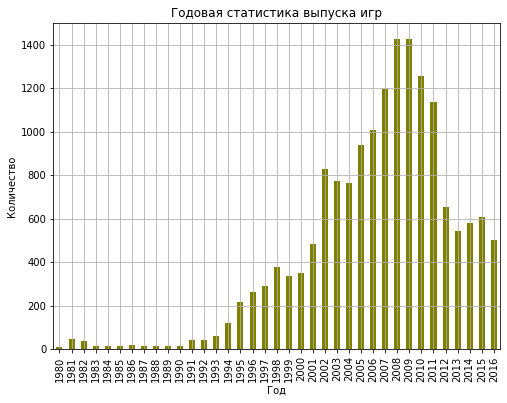

In [36]:
data_games['year_of_release'].value_counts().sort_index().plot(kind = 'bar', figsize = (8,6),
                                 grid = True,color = 'olive').set_title('Годовая статистика выпуска игр')
plt.xlabel("Год")
plt.ylabel("Количество")

*Больше всего игр выпускалось в период с 2006 по 2010, а пиком стал 2008 год. Могу предположить, что такой рост связан с Мировым экономическим кризисом, люди теряли работу и погружались в виртуальный мир. Еще одним вариантом спроса на игры в те времена можно считать развитие цифровых технологий.*

***Посмотрим, как менялись продажи по платформам***

In [37]:
platform_sales = pd.pivot_table(data_games, index=['platform'], values='sum_sales', aggfunc='sum').sort_values('sum_sales')
platform_sales

,sum_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,28.35


Text(0, 0.5, 'Количество продаж')

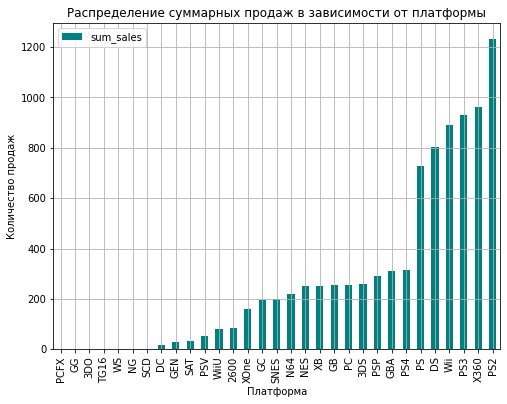

In [38]:
platform_sales = pd.pivot_table(data_games, index=['platform'], values='sum_sales', aggfunc='sum').sort_values('sum_sales').plot(kind = 'bar', figsize = (8,6),
                    grid = True,color = 'teal').set_title('Распределение суммарных продаж в зависимости от платформы')
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

*Наибольшее количество игр выпустили платформы PS2,X360,PS3,Wii,DS.*

***Выберим платформы с наибольшими суммарными продажами и построим распределение по годам***

In [39]:
platforms_top_6 = data_games.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales',
                                                    ascending=False).head(6)
platforms_top_6 = platforms_top_6.reset_index().rename_axis(None, axis=1)
platforms_top_6

,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58


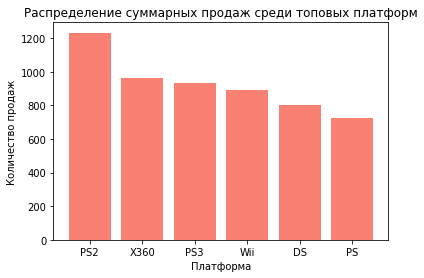

In [40]:
index = ['PS2','X360','PS3','Wii','DS','PS']
values = [1233.56,961.24,931.33,891.18,802.78,727.58]
plt.bar(index,values,color = 'salmon')                              
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")
plt.title('Распределение суммарных продаж среди топовых платформ')
plt.show()

In [57]:
tmp = data_games \
                .pivot_table(index='platform', values='sum_sales', aggfunc= 'sum') \
                .sort_values('sum_sales', ascending=False)

tmp = tmp.index[:6].tolist()

tmp

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

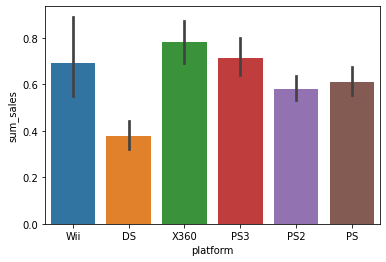

In [58]:
sns.barplot(data=data_games[data_games['platform'].isin(tmp)], x='platform', y='sum_sales')

*Больше всего продаж у PS2*

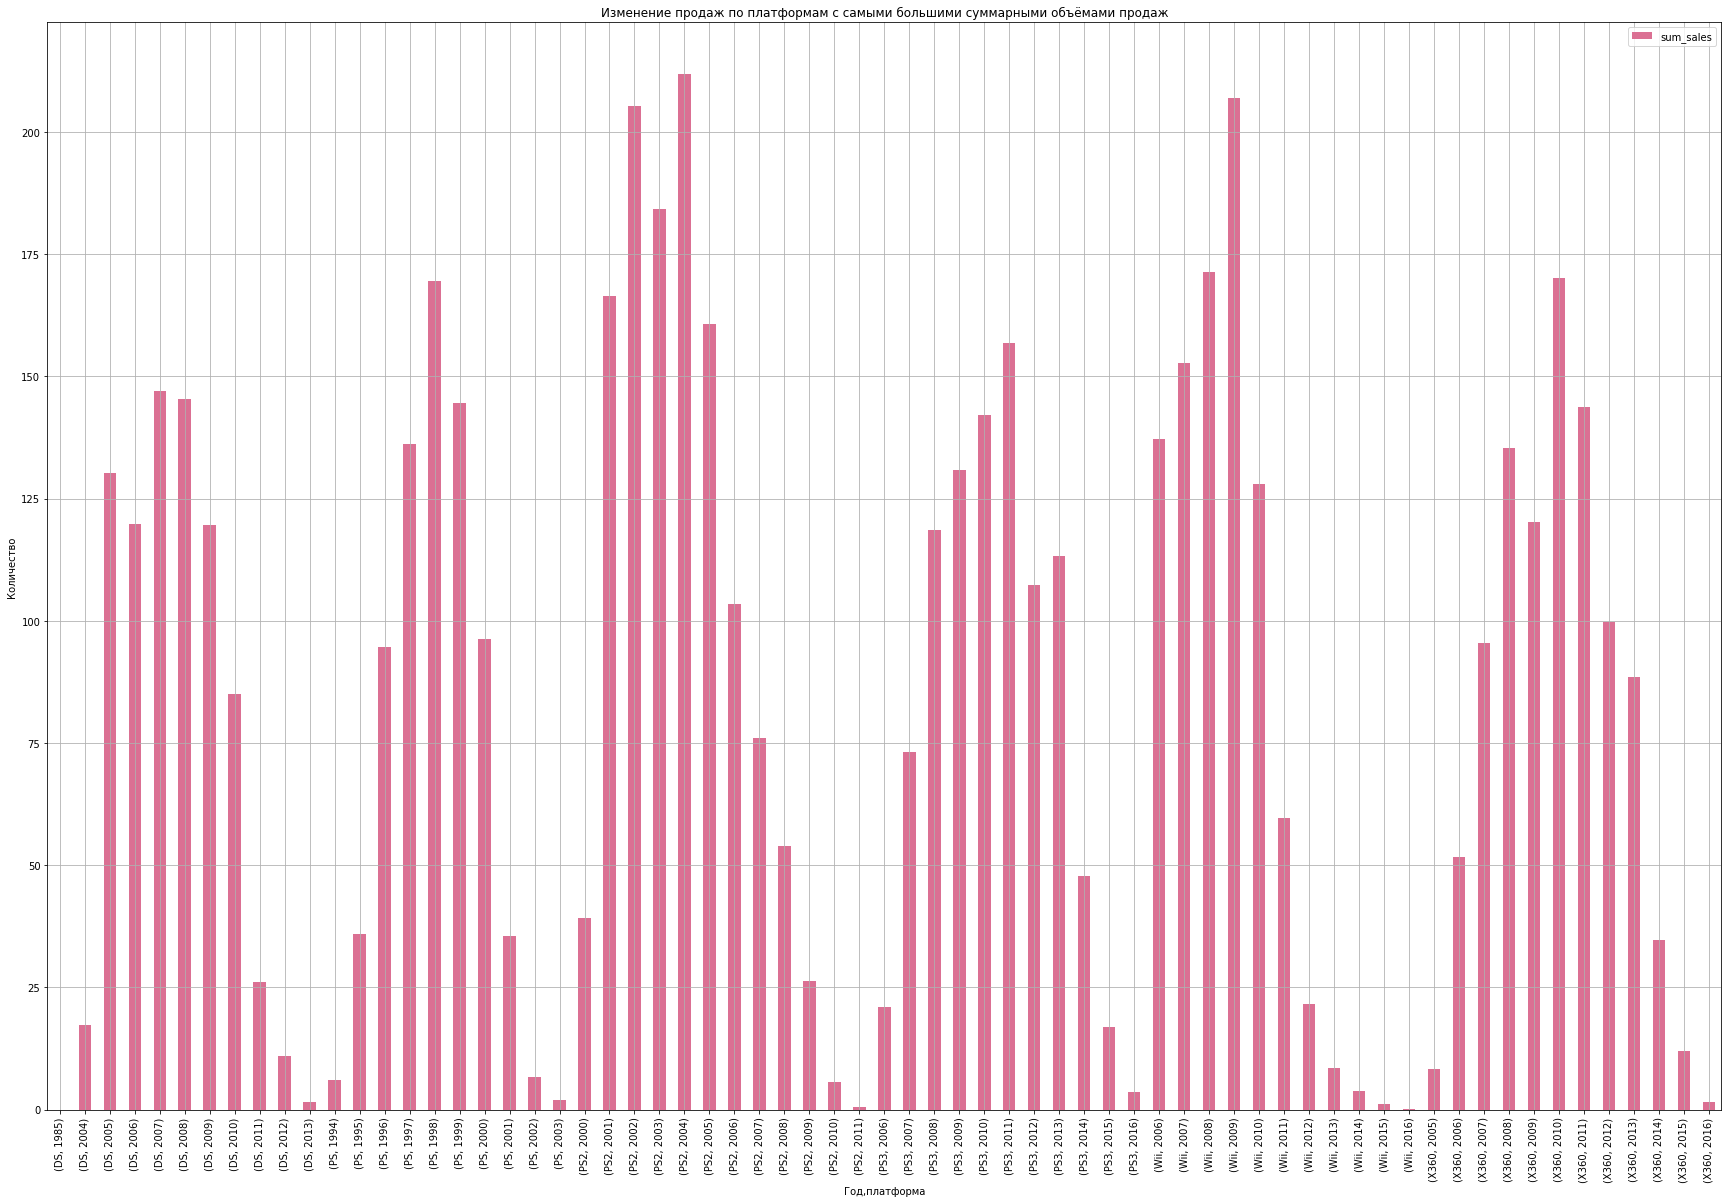

In [151]:
(data_games.pivot_table(index=['platform', 'year_of_release'], values='sum_sales',
aggfunc='sum').query('platform in ["PS2", "X360", "PS3","Wii", "DS", "PS"]')
.plot(y='sum_sales',kind='bar',figsize=(30,20),grid=True, color = 'palevioletred'))
plt.xlabel("Год,платформа")
plt.ylabel("Количество")
plt.title('Изменение продаж по платформам с самыми большими суммарными объёмами продаж')
plt.show()

*Платформы актуальны в среднем 8 лет*

***Выбор и анализ актуального периода для прогноза***

***Актуальным будем считать период с  2013 по 2016 год***

In [152]:
actual_data = data_games.query('year_of_release > 2012')
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  sum_sales        2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


In [153]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


***Найдем лидера продаж***

In [154]:
best_sales_platform = pd.pivot_table(actual_data, index='platform', values='sum_sales', aggfunc = 'sum')
best_sales_platform.sort_values('sum_sales', ascending=False)

,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


***Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам***

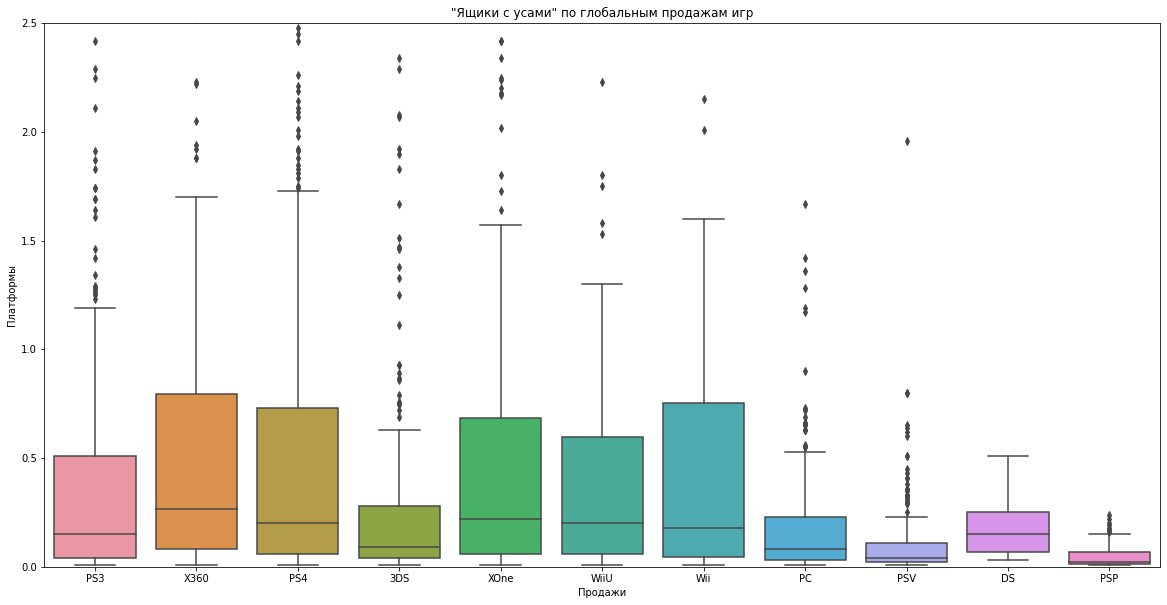

In [167]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=actual_data, x='platform', y='sum_sales')

plt.ylim(0, 2.5)

plt.title('"Ящики с усами" по глобальным продажам игр')
plt.xlabel('Продажи')
plt.ylabel('Платформы')

plt.show()

Медианные значения у всех разнятся.Больше всех продаж X360, меньше всего у PSP.

***Как влияют на продажи внутри платформы "X360"  отзывы пользователей и критиков?***

In [51]:
actual_data.query('platform == "X360"')['sum_sales'].corr(actual_data.query('platform == "X360"')['user_score'])
#посчитаем корреляцию

-0.011742185147181342

*Объём продаж и оценки пользователей практически не коррелируют.*

In [52]:
actual_data.query('platform == "X360"')['sum_sales'].corr(actual_data.query('platform == "X360"')['critic_score'])
#посчитаем корреляцию

0.3503445460228664

*Объём продаж и оценки критиков коррелируют незначительно.*

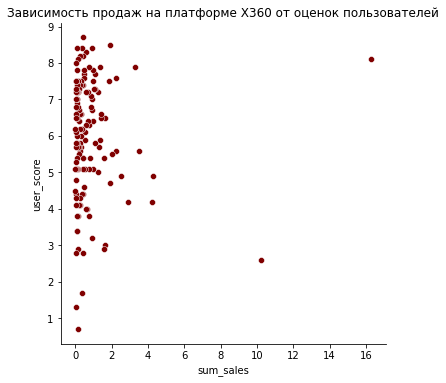

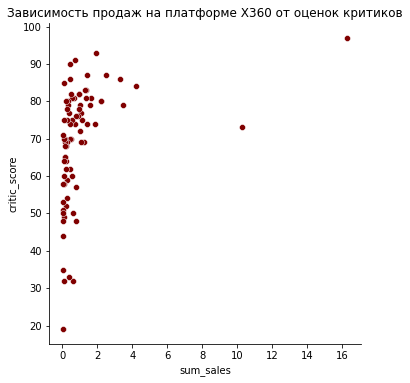

In [170]:
sns.relplot(x='sum_sales', y='user_score',data=actual_data.query('platform == "X360"'),color = 'maroon')
plt.title('Зависимость продаж на платформе X360 от оценок пользователей')
sns.relplot(x='sum_sales', y='critic_score',data=actual_data.query('platform == "X360"'),color = 'maroon')
plt.title('Зависимость продаж на платформе X360 от оценок критиков')
plt.show()

***Как влияют на продажи внутри других топовых платформ отзывы пользователей и критиков?***

In [176]:
actual_data.query('platform == "PS3"')['sum_sales'].corr(actual_data.query('platform == "PS3"')['user_score'])
#корреляция

0.0023944027357566925

*Объём продаж и оценки пользователей практически не коррелируют.*

In [168]:
actual_data.query('platform == "PS3"')['sum_sales'].corr(actual_data.query('platform == "PS3"')['critic_score'])
#корреляция

0.3342853393371919

*Объём продаж и оценки критиков коррелируют незначительно.*

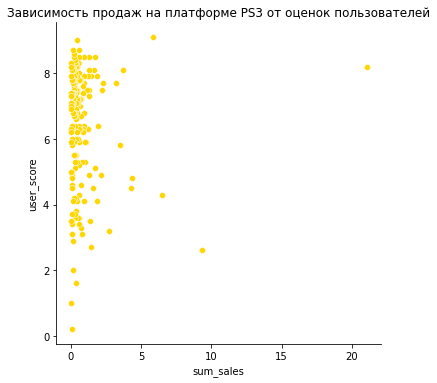

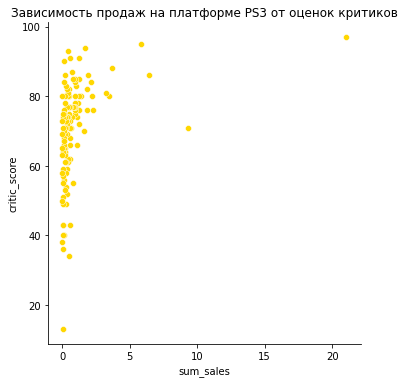

In [171]:
sns.relplot(x='sum_sales', y='user_score',data=actual_data.query('platform == "PS3"'),color = 'gold')
plt.title('Зависимость продаж на платформе PS3 от оценок пользователей')
sns.relplot(x='sum_sales', y='critic_score',data=actual_data.query('platform == "PS3"'),color = 'gold')
plt.title('Зависимость продаж на платформе PS3 от оценок критиков')
plt.show()

In [177]:
actual_data.query('platform == "XOne"')['sum_sales'].corr(actual_data.query('platform == "XOne"')['user_score'])
#корреляция

-0.06892505328279412

*Объём продаж и оценки пользователей практически не коррелируют.*

In [181]:
actual_data.query('platform == "XOne"')['sum_sales'].corr(actual_data.query('platform == "XOne"')['critic_score'])
#корреляция

0.41699832800840175

*Объём продаж и оценки критиков коррелируют незначительно.*

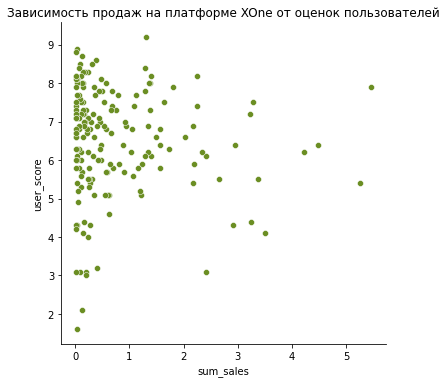

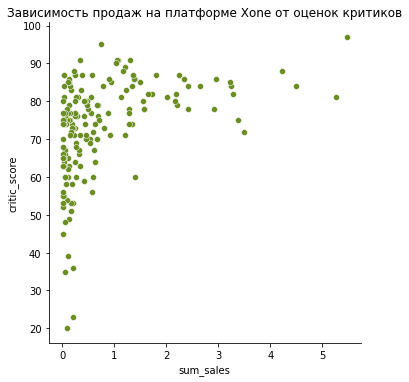

In [173]:
sns.relplot(x='sum_sales', y='user_score',data=actual_data.query('platform == "XOne"'),color = 'olivedrab')
plt.title('Зависимость продаж на платформе XOne от оценок пользователей')
sns.relplot(x='sum_sales', y='critic_score',data=actual_data.query('platform == "XOne"'),color = 'olivedrab')
plt.title('Зависимость продаж на платформе Xone от оценок критиков')
plt.show()

In [178]:
actual_data.query('platform == "3DS"')['sum_sales'].corr(actual_data.query('platform == "3DS"')['user_score'])
#корреляция

0.24150411773563016

*Объём продаж и оценки пользователей незначительно коррелируют.*

In [174]:
actual_data.query('platform == "3DS"')['sum_sales'].corr(actual_data.query('platform == "3DS"')['critic_score'])
#корреляция

0.35705661422881035

*Объём продаж и оценки критиков незначительно коррелируют.*

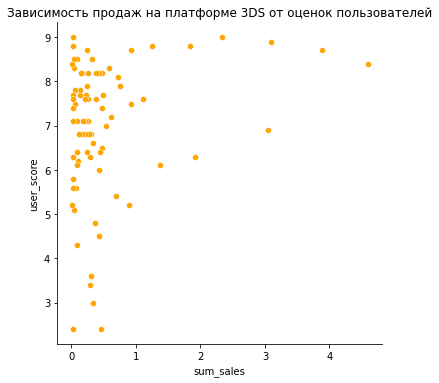

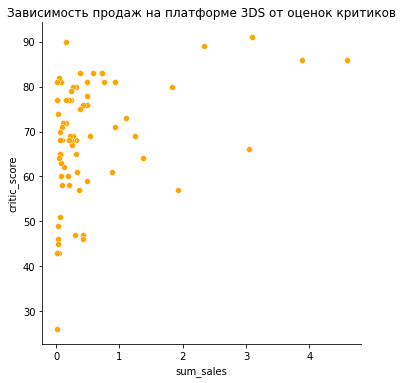

In [175]:
sns.relplot(x='sum_sales', y='user_score',data=actual_data.query('platform == "3DS"'),color = 'orange')
plt.title('Зависимость продаж на платформе 3DS от оценок пользователей')
sns.relplot(x='sum_sales', y='critic_score',data=actual_data.query('platform == "3DS"'),color = 'orange')
plt.title('Зависимость продаж на платформе 3DS от оценок критиков')
plt.show()

***Посмотрим на общее распределение игр по жанрам***

In [182]:
count_genre = data_games['genre'].value_counts()
count_genre

Action          3307
Sports          2305
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [183]:
(
    actual_data
    .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
    .sort_values('sum_sales', ascending=False)
)

,sum_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [184]:
actual_data.groupby('genre')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


*У наиболее прибыльных жанров наблюдаем значительную разницу между средними и медианными значениями и большое значение стандартных отклонений, что свидетельствует о неоднородности данных.*

*Для жанров, приносящих меньше прибыли характерно более низкое стандартное отклонение, но разница между медианой и средним всё же довольно высокая.*

*После рассмотрения медианных и средних значений можно сделать заключение: жанром-лидером со стабильными продажами с большим отрывом от конкурентов является Shooter.*

In [196]:
actual_data.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False)
#объем продаж по жанрам

,sum_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Text(0, 0.5, 'Количество продаж')

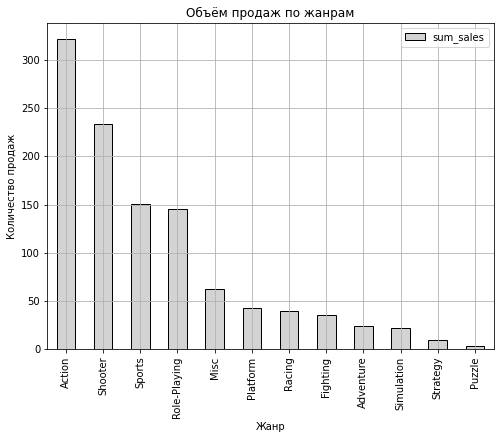

In [186]:
actual_data.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False).plot(kind = 'bar', figsize = (8,6),
                    grid = True,color = 'lightgrey', edgecolor = 'k').set_title('Объём продаж по жанрам')
plt.xlabel("Жанр")
plt.ylabel("Количество продаж")

**Вывод по третьему шагу:**

*1.Больше всего игр выпускалось в период с 2006 по 2010, а пиком стал 2008 год. Могу предположить, что такой рост связан с Мировым экономическим кризисом, люди теряли работу и погружались в виртуальный мир. Еще одним вариантом спроса на игры в те времена можно считать развитие цифровых технологий;*

*2.Самые популярные игровые платформы за весь период : PS2, X360, PS3,Wii,DS,PS;*

*3.В среднем платформа актуальна 8 лет. Пик продаж наступает примерно через 5 лет после выхода приставки. Лидеры продаж PS4 и X360;*

*4.Объем продаж и оценки пользователей практически не коррелируют, а вот объем продаж и оценки критиков коррелируют незначительно;*

*5.После рассмотрения медианных и средних значений можно сделать заключение: жанром-лидером со стабильными продажами с большим отрывом от конкурентов является Shooter, несмотря на то, что графики выводят другое.Самым популярным жанром является "Shooter", а самым непопулярным "Puzzle".*

## Составим портрет пользователя каждого региона

***Портрет пользователя из Северной Америки***

In [187]:
na_sales_pl = actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales',
                                                                                                      ascending=False)
na_sales_pl.head()
#cамые популярные платформы в Северной Америке

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [188]:
na_sales_g = actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales',
                                                                                                      ascending=False)
na_sales_g.head()
#cамые популярные жанры в Северной Америке

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [189]:
esrbna = actual_data.pivot_table(index=['platform', 'rating'], values='na_sales', aggfunc='sum').sort_values('na_sales',
               ascending=False)
esrbna.head()
#влияние рейтинга ESRB на продажи в Северной Америке

,,na_sales
platform,rating,
XOne,M,44.92
PS4,M,42.81
X360,M,38.41
PS3,M,29.75
PS4,unknown,23.77


***Портрет пользователя из Европы***

In [190]:
eu_sales_pl = actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales',
                                                                                                      ascending=False)
eu_sales_pl.head()
#cамые популярные платформы в Европе

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [191]:
eu_sales_g = actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales',
                                                                                                      ascending=False)
eu_sales_g.head()
#cамые популярные жанры в Европе

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [192]:
esrbeu = actual_data.pivot_table(index=['platform', 'rating'], values='eu_sales', aggfunc='sum').sort_values('eu_sales',
                                                                                                                ascending=False)
esrbeu.head()
#влияние рейтинга ESRB на продажи в Европе 

eu_sales
platform rating           
PS4      M           58.43
PS3      M           31.75
PS4      unknown     27.99
         E           27.56
XOne     M           23.74

***Портрет пользователя из Японии***

In [193]:
jp_sales_pl = actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales',
                                                                                                      ascending=False)
jp_sales_pl.head()
#cамые популярные платформы в Японии

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


In [194]:
jp_sales_g = actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales',
                                                                                                      ascending=False)
jp_sales_g.head()
#cамые популярные жанры в Японии

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


In [195]:
esrbjp = actual_data.pivot_table(index=['platform', 'rating'], values='jp_sales', aggfunc='sum').sort_values('jp_sales',
                ascending=False)
esrbjp.head()
#влияние рейтинга ESRB на продажи в Японии

,,jp_sales
platform,rating,
3DS,unknown,52.40
PSV,unknown,11.75
PS3,unknown,8.96
3DS,E,6.94
PS3,T,6.87


**Вывод по четвертому шагу:**

*Самые популярные игровые платформы в Cеверной Америке это: PS4, XOne, X360, PS3, 3DS;Топ 5 жанров в Cеверной Aмерике : Action, Shooter, Sports,Role-Playing,Misc; Больше всего продаж у игр с рейтингом "M";*

*Самые популярные игровые платформы в Европе это: PS4, PS3, XOne, X360, 3DS;Топ 5 жанров в Европе : Action, Shooter, Sports,Role-Playing,Racing; Больше всего продаж у игр с рейтингом "M";*

*Самые популярные игровые платформы в Японии это: 3DS,PS3,PSV,PS4,WiiU;Топ 5 жанров в Европе : Role-Playing, Action, Misc, Fighting, Shooter; Больше всего продаж у игр с рейтингом "E".*


## Проверка гипотез

***Средние пользовательские рейтинги платформ Xbox One и PC одинаковые***

***Нулевая гипотеза: средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC.***

***Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.***

In [70]:
alpha = 0.05

results = st.ttest_ind(
    actual_data[actual_data['platform'] == 'PC']['user_score'].dropna(), 
    actual_data[actual_data['platform'] == 'XOne']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


*Не получилось отвергуть нулевую гипотезу.*
*С небольшой вероятностью можно получить различность рейтингов двух платформ*

***Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.***

***Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.***

***Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.***

In [71]:
alpha = 0.05

results = st.ttest_ind(
    actual_data[actual_data['genre'] == 'Action']['user_score'].dropna(), 
    actual_data[actual_data['genre'] == 'Sports']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


*Отвергли нулевую гипотезу.* 
*Практически нет вероятности получить одинаковые средние рейнтинги по двум жанрам.*

## Общий вывод

**В данном исследовательском проекте нужно было выявить определяющие успешность игры закономерности и сделать ставку на потенциально популярный продукт. Вот мой прогноз для улучшения кампании на следующий год:***

*1.Лидеры продаж PS4 и X360.В среднем платформа актуальна 8 лет, а пик продаж наступает примерно через 5 лет после выхода приставки;*

*2. После рассмотрения медианных и средних значений можно сделать заключение: жанром-лидером со стабильными продажами с большим отрывом от конкурентов является Shooter, несмотря на то, что графики выводят другое.Самым популярным жанром является "Shooter", а самым непопулярным "Puzzle";*

*3.Если выходить на международный рынок, то в Америке и Европе самые популярные платформы PS4, а в Японии 3DS;*

*4.Объем продаж и оценки пользователей практически не коррелируют, а вот объем продаж и оценки критиков коррелируют незначительно;*

*Так же мы проверили две гипотезы, заявленные в самом начале исследования, где получили следующие данные:*

*1)Cредние пользовательские рейтинги Xbox One и PC различаются;*

*2)Практически нет вероятности получить одинаковые средние рейнтинги по жанрам Action и Sports.*